In [8]:
pip install requests beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import os

def download_images(base_url, output_folder):
    page = 1
    while True:
        url = f"{base_url}&start={(page-1)*100}"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all image links
        links = soup.find_all('a', href=True)
        image_links = [link['href'] for link in links if link['href'].endswith(('.jpg', '.tif', '.png'))]

        if not image_links:
            break  # No more images found, exit loop

        for link in image_links:
            filename = os.path.join(output_folder, link.split('/')[-1])
            response = requests.get(link)
            with open(filename, 'wb') as file:
                file.write(response.content)
            print(f"Downloaded: {filename}")

        page += 1

# Usage
base_url = "https://pds-imaging.jpl.nasa.gov/search/?fq=TARGET_NAME%3Amars&fq=ATLAS_SPACECRAFT_NAME%3A%22carl%20sagan%20memorial%20station%22&q=*%3A*"
output_folder = "nasa_mars_images"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

download_images(base_url, output_folder)

In [10]:
import requests
from bs4 import BeautifulSoup
import os

def download_images(base_url, output_folder):
    page = 1
    while True:
        url = f"{base_url}&start={(page-1)*100}"
        print(f"Accessing page: {url}")
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all image links
        links = soup.find_all('a', href=True)
        image_links = [link['href'] for link in links if link['href'].endswith(('.jpg', '.tif', '.png'))]

        print(f"Found {len(image_links)} image links on this page")

        if not image_links:
            print("No more images found, exiting loop")
            break  # No more images found, exit loop

        for link in image_links:
            filename = os.path.join(output_folder, link.split('/')[-1])
            print(f"Attempting to download: {link}")
            response = requests.get(link)
            if response.status_code == 200:
                with open(filename, 'wb') as file:
                    file.write(response.content)
                print(f"Successfully downloaded: {filename}")
            else:
                print(f"Failed to download: {link}. Status code: {response.status_code}")

        page += 1

# Usage
base_url = "https://pds-imaging.jpl.nasa.gov/search/?fq=TARGET_NAME%3Amars&fq=ATLAS_SPACECRAFT_NAME%3A%22carl%20sagan%20memorial%20station%22&q=*%3A*"
output_folder = "nasa_mars_images"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

download_images(base_url, output_folder)

Accessing page: https://pds-imaging.jpl.nasa.gov/search/?fq=TARGET_NAME%3Amars&fq=ATLAS_SPACECRAFT_NAME%3A%22carl%20sagan%20memorial%20station%22&q=*%3A*&start=0
Found 0 image links on this page
No more images found, exiting loop


In [11]:
import requests
from bs4 import BeautifulSoup
import os

def download_images(base_url, output_folder):
    page = 1
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    url = f"{base_url}&start={(page-1)*100}"
    print(f"Accessing page: {url}")
    response = requests.get(url, headers=headers)

    print("Response status code:", response.status_code)
    print("Response headers:")
    print(response.headers)

    print("\nFirst 1000 characters of the response content:")
    print(response.text[:1000])

    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all links
    links = soup.find_all('a', href=True)
    print(f"\nFound {len(links)} total links on the page")

    # Print out all links
    for link in links:
        print(f"Link: {link['href']}")

    # Find image links
    image_links = [link['href'] for link in links if link['href'].endswith(('.jpg', '.tif', '.png'))]
    print(f"\nFound {len(image_links)} image links on this page")

# Usage
base_url = "https://pds-imaging.jpl.nasa.gov/search/?fq=TARGET_NAME%3Amars&fq=ATLAS_SPACECRAFT_NAME%3A%22carl%20sagan%20memorial%20station%22&q=*%3A*"
output_folder = "nasa_mars_images"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

download_images(base_url, output_folder)

Accessing page: https://pds-imaging.jpl.nasa.gov/search/?fq=TARGET_NAME%3Amars&fq=ATLAS_SPACECRAFT_NAME%3A%22carl%20sagan%20memorial%20station%22&q=*%3A*&start=0
Response status code: 403
Response headers:
{'Server': 'awselb/2.0', 'Date': 'Mon, 14 Oct 2024 02:44:45 GMT', 'Content-Type': 'text/html', 'Content-Length': '520', 'Connection': 'keep-alive'}

First 1000 characters of the response content:
<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->
<!-- a padding to disable MSIE and Chrome friendly error page -->


Found 0 total links on the page

Found 0 image links on this page


In [13]:
import requests
import os

def fetch_nasa_images(api_key, query):
    base_url = "https://images-api.nasa.gov/search"
    params = {
        "q": query,
        "media_type": "image"
    }
    headers = {
        "Authorization": f"Bearer {api_key}"
    }

    response = requests.get(base_url, params=params, headers=headers)

    print(f"Response Status Code: {response.status_code}")
    print(f"Response Headers: {response.headers}")

    if response.status_code == 200:
        data = response.json()
        if 'collection' in data and 'items' in data['collection']:
            print(f"Found {len(data['collection']['items'])} items")
            for item in data['collection']['items'][:5]:  # Print details of first 5 items
                print(f"Title: {item['data'][0]['title']}")
                print(f"NASA ID: {item['data'][0]['nasa_id']}")
                print(f"Date Created: {item['data'][0]['date_created']}")
                print("---")
        else:
            print("No items found in the response")
    else:
        print(f"Error: {response.text}")

# Usage
api_key = "isFVWcRIMU0m6N4qFekReMaH9RuIt9joAdSKlftU"  # Replace with your actual API key
query = "Mars Pathfinder"  # You can adjust this query as needed

fetch_nasa_images(api_key, query)

Response Status Code: 403
Response Headers: {'Server': 'CloudFront', 'Date': 'Mon, 14 Oct 2024 02:46:06 GMT', 'Content-Type': 'text/html', 'Content-Length': '919', 'Connection': 'keep-alive', 'X-Cache': 'Error from cloudfront', 'Via': '1.1 badefad2d1fb92bb4620df1ce11d8c92.cloudfront.net (CloudFront)', 'X-Amz-Cf-Pop': 'DEN52-P2', 'X-Amz-Cf-Id': 'JAS8B7mSVI_xt3G0-zSsk-2aRgWeexVP9khy7kojARGYbE4hWRQHvA=='}
Error: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<HTML><HEAD><META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">
<TITLE>ERROR: The request could not be satisfied</TITLE>
</HEAD><BODY>
<H1>403 ERROR</H1>
<H2>The request could not be satisfied.</H2>
<HR noshade size="1px">
Request blocked.
We can't connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.
<BR clear="all">
If you provide content to

In [14]:
import requests
import os

def fetch_and_download_nasa_images(api_key, query, keywords, max_images=10):
    base_url = "https://images-api.nasa.gov/search"
    params = {
        "q": query,
        "media_type": "image",
        "keywords": keywords
    }

    response = requests.get(base_url, params=params)

    print(f"Response Status Code: {response.status_code}")

    if response.status_code == 200:
        data = response.json()
        if 'collection' in data and 'items' in data['collection']:
            items = data['collection']['items']
            print(f"Found {len(items)} items")

            download_count = 0
            for item in items:
                if download_count >= max_images:
                    break

                nasa_id = item['data'][0]['nasa_id']
                title = item['data'][0]['title']

                # Get the image URL
                asset_url = f"https://images-api.nasa.gov/asset/{nasa_id}"
                asset_response = requests.get(asset_url)
                if asset_response.status_code == 200:
                    asset_data = asset_response.json()
                    image_url = next((item['href'] for item in asset_data['collection']['items'] if item['href'].endswith('.jpg')), None)

                    if image_url:
                        # Download the image
                        img_response = requests.get(image_url)
                        if img_response.status_code == 200:
                            filename = f"{nasa_id}.jpg"
                            with open(filename, 'wb') as f:
                                f.write(img_response.content)
                            print(f"Downloaded: {filename} - {title}")
                            download_count += 1
        else:
            print("No items found in the response")
    else:
        print(f"Error: {response.text}")

# Usage
api_key = "isFVWcRIMU0m6N4qFekReMaH9RuIt9joAdSKlftU"  # Replace with your actual API key
query = "Mars Pathfinder"
keywords = "Carl Sagan Memorial Station,IMP"  # You can adjust these keywords as needed
max_images = 10  # Adjust this number to download more or fewer images

fetch_and_download_nasa_images(api_key, query, keywords, max_images)

Response Status Code: 403
Error: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<HTML><HEAD><META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">
<TITLE>ERROR: The request could not be satisfied</TITLE>
</HEAD><BODY>
<H1>403 ERROR</H1>
<H2>The request could not be satisfied.</H2>
<HR noshade size="1px">
Request blocked.
We can't connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.
<BR clear="all">
If you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.
<BR clear="all">
<HR noshade size="1px">
<PRE>
Generated by cloudfront (CloudFront)
Request ID: iD0Tb1J7U3hK9hl9MGELj3Tkgq6OnI89rUc6GEPqnFWINdxNWfW_yg==
</PRE>
<ADDRESS>
</ADDRESS>
</BODY></HTML>


In [3]:
import requests
import os
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

def fetch_nasa_images(query, page=1):
    base_url = "https://images-api.nasa.gov/search"
    params = {
        "q": query,
        "media_type": "image",
        "page": page,
        "page_size": 100  # Maximum allowed by the API
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching page {page}: {response.status_code}")
        return None

def download_image(item, output_folder):
    nasa_id = item['data'][0]['nasa_id']
    title = item['data'][0]['title']

    asset_url = f"https://images-api.nasa.gov/asset/{nasa_id}"
    asset_response = requests.get(asset_url)

    if asset_response.status_code == 200:
        asset_data = asset_response.json()
        image_url = next((item['href'] for item in asset_data['collection']['items'] if item['href'].endswith('.jpg')), None)

        if image_url:
            img_response = requests.get(image_url)
            if img_response.status_code == 200:
                filename = os.path.join(output_folder, f"{nasa_id}.jpg")
                with open(filename, 'wb') as f:
                    f.write(img_response.content)
                print(f"Downloaded: {filename} - {title}")
                return filename

    print(f"Failed to download: {nasa_id} - {title}")
    return None

def download_all_mars_images(output_folder, max_images=None):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    page = 1
    total_downloaded = 0

    while True:
        data = fetch_nasa_images("Mars", page)
        if not data or 'collection' not in data or 'items' not in data['collection']:
            break

        items = data['collection']['items']
        if not items:
            break

        with ThreadPoolExecutor(max_workers=10) as executor:
            future_to_item = {executor.submit(download_image, item, output_folder): item for item in items}
            for future in as_completed(future_to_item):
                if future.result():
                    total_downloaded += 1
                    if max_images and total_downloaded >= max_images:
                        return total_downloaded

        print(f"Completed page {page}, total downloaded: {total_downloaded}")
        page += 1
        time.sleep(1)  # To avoid hitting API rate limits

    return total_downloaded

# Usage
output_folder = "mars_images"
max_images = None  # Set to a number if you want to limit the downloads, or None for all images

total_downloaded = download_all_mars_images(output_folder, max_images)
print(f"Total images downloaded: {total_downloaded}")

Downloaded: mars_images/NHQ201905310037.jpg - Mars Celebration
Downloaded: mars_images/NHQ201906010007.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310026.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310040.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310041.jpg - Mars CelebrationDownloaded: mars_images/NHQ201905310042.jpg - Mars Celebration

Downloaded: mars_images/NHQ201905310035.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310039.jpg - Mars Celebration
Downloaded: mars_images/NHQ201906010004.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310034.jpg - Mars Celebration
Downloaded: mars_images/NHQ201906010008.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310033.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310045.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310024.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310038.jpg - Mars Celebration
Downloaded: mars_images/NHQ201905310028.jpg - Mars Cele

In [15]:
import os

def list_downloaded_images(folder):
    print(f"\nListing images in {folder}:")
    if os.path.exists(folder):
        files = os.listdir(folder)
        image_files = [f for f in files if f.endswith('.jpg')]
        for image in image_files[:10]:  # List first 10 images
            print(image)
        if len(image_files) > 10:
            print(f"... and {len(image_files) - 10} more")
        print(f"\nTotal images: {len(image_files)}")
    else:
        print(f"Folder {folder} does not exist.")

# Add this at the end of your main script
list_downloaded_images(output_folder)


Listing images in nasa_mars_images:

Total images: 0


In [16]:
import os

def locate_image_folder(folder_name="mars_images"):
    # Get the current working directory
    current_dir = os.getcwd()
    print(f"Current working directory: {current_dir}")

    # Construct the full path to the image folder
    image_folder = os.path.join(current_dir, folder_name)
    print(f"Expected image folder location: {image_folder}")

    # Check if the folder exists
    if os.path.exists(image_folder):
        print(f"The folder '{folder_name}' exists.")
        # List contents of the folder
        files = os.listdir(image_folder)
        print(f"Contents of the folder (first 10 items):")
        for file in files[:10]:
            print(f"  {file}")
        if len(files) > 10:
            print(f"  ... and {len(files) - 10} more items")
    else:
        print(f"The folder '{folder_name}' does not exist in the current directory.")

        # Search for the folder in the current directory and its immediate subdirectories
        print("Searching for the folder in nearby locations...")
        for root, dirs, files in os.walk(current_dir):
            if folder_name in dirs:
                found_path = os.path.join(root, folder_name)
                print(f"Found the folder at: {found_path}")
                return

        print(f"Could not find the '{folder_name}' folder in the current directory or its immediate subdirectories.")

# Run the function
locate_image_folder()

Current working directory: /content
Expected image folder location: /content/mars_images
The folder 'mars_images' exists.
Contents of the folder (first 10 items):
  PIA01467.jpg
  PIA12488.jpg
  PIA03639.jpg
  PIA10247.jpg
  PIA10743.jpg
  PIA05491.jpg
  PIA14834.jpg
  PIA21488.jpg
  PIA05209.jpg
  PIA14261.jpg
  ... and 787 more items


In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Replace with the path to one of your images
image_path = "/content/mars_images/PIA01040.jpg"

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/mars_images/PIA01040.jpg'

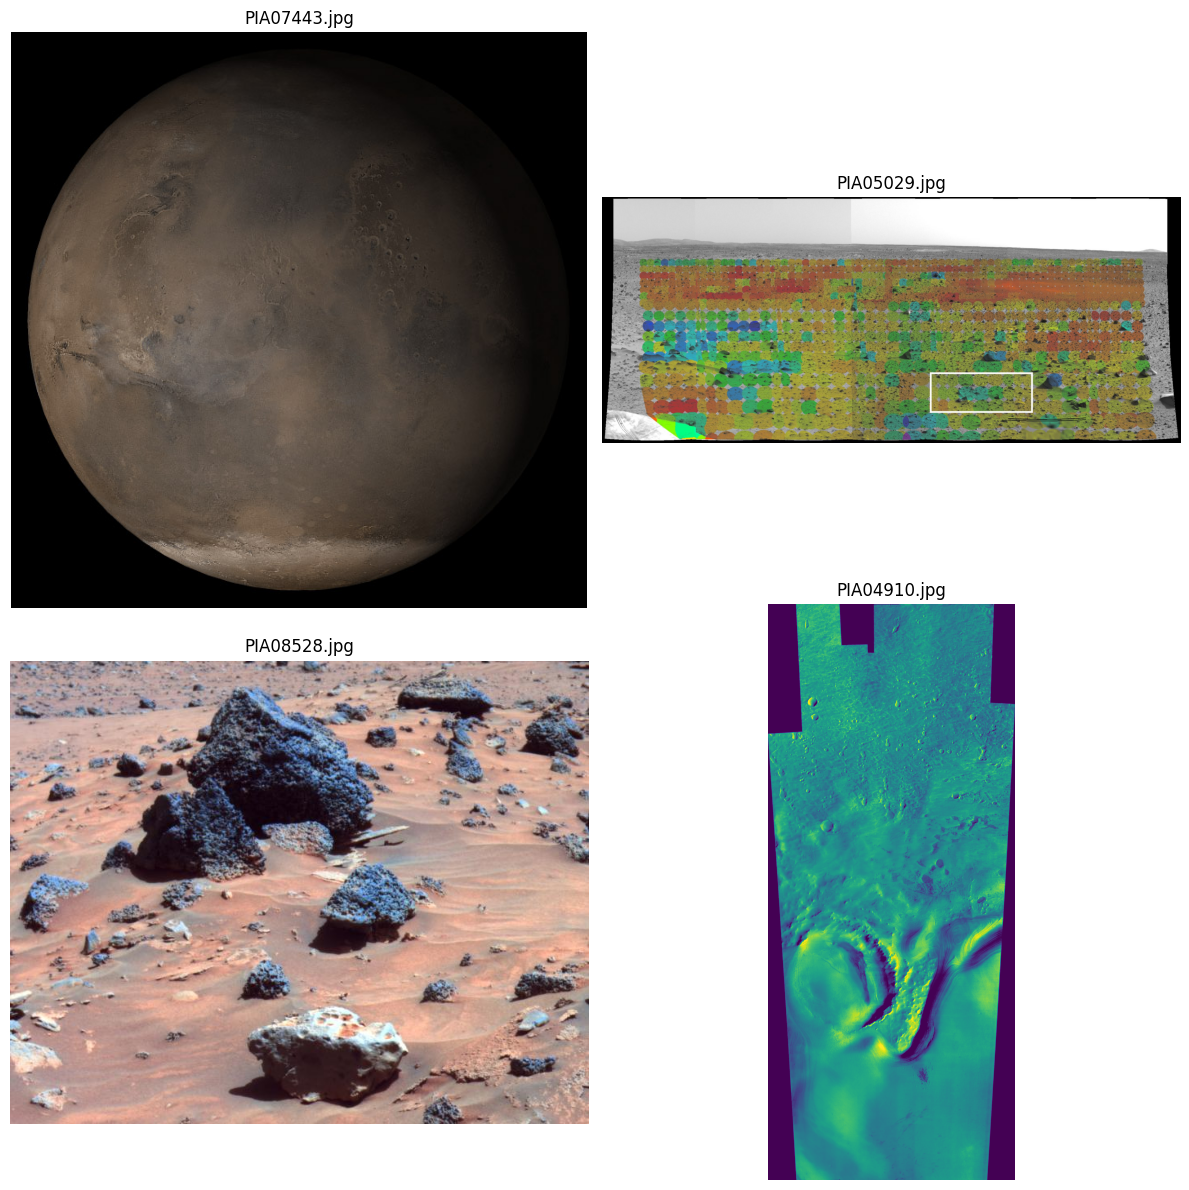

Total number of images in the directory: 797


In [19]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

def display_random_images(image_dir, num_images=4):
    # Get all image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))]

    # Randomly select images to display
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    # Create a subplot for each image
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(image_dir, image_file)
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].set_title(image_file)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Usage
image_dir = "/content/mars_images"
display_random_images(image_dir)

# Print total number of images
total_images = len([f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))])
print(f"Total number of images in the directory: {total_images}")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (98799512 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Error loading image PIA08792.jpg: Image size (548050388 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (161792400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Error loading image PIA08060.jpg: Image size (191231363 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.4429 - loss: 1.2216 - val_accuracy: 0.4688 - val_loss: 0.6927
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.5686 - loss: 0.6882 - val_accuracy: 0.4922 - val_loss: 0.7011
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.5896 - loss: 0.6662 - val_accuracy: 0.5156 - val_loss: 0.7057
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.6535 - loss: 0.5829 - val_accuracy: 0.5000 - val_loss: 0.8197
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.7507 - loss: 0.5313 - val_accuracy: 0.5547 - val_loss: 0.9372
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8065 - loss: 0.3824 - val_accuracy: 0.5156 - val_loss: 0.9428
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8567 - loss: 0.3106 - val_accuracy: 0.4922 - val_loss: 1.1192
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.8915 - loss: 0.2450 - val_accuracy: 0.4844 - val_loss:

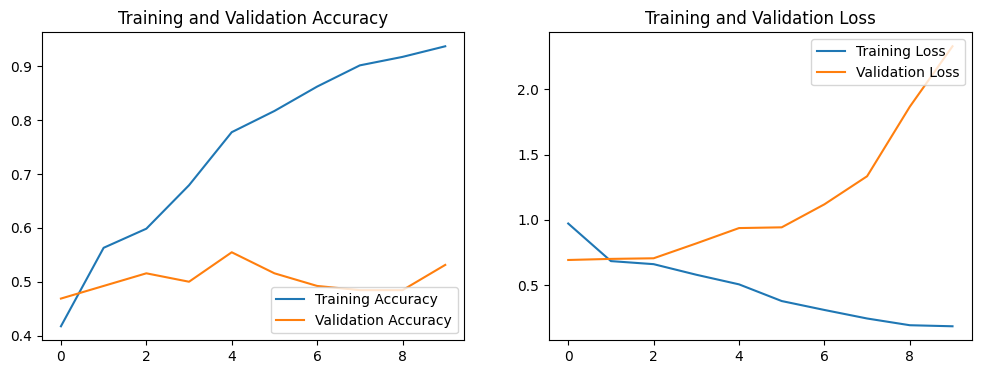

5/5 - 4s - 810ms/step - accuracy: 0.5157 - loss: 2.0979

Test accuracy: 0.5157232880592346
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predictions for the first 5 test images:
Image 1: No Water (confidence: 0.00)
Image 2: Water (confidence: 0.88)
Image 3: No Water (confidence: 0.23)
Image 4: Water (confidence: 0.83)
Image 5: No Water (confidence: 0.01)


In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def load_and_preprocess_data(data_dir, img_height=224, img_width=224):
    try:
        image_files = [f for f in os.listdir(data_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff'))]
        if not image_files:
            raise ValueError(f"No image files found in {data_dir}")

        images = []
        for img_file in image_files:
            img_path = os.path.join(data_dir, img_file)
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
            except Exception as e:
                print(f"Error loading image {img_file}: {str(e)}")

        if not images:
            raise ValueError("No images could be loaded successfully")

        images = np.array(images)
        images = images / 255.0  # Normalize pixel values
        return images
    except Exception as e:
        print(f"Error in load_and_preprocess_data: {str(e)}")
        return None

# ... [rest of the functions remain the same] ...

# Main execution
data_dir = '/content/mars_images'  # Updated to use the correct path
images = load_and_preprocess_data(data_dir)

if images is not None:
    # For this example, we're creating dummy labels. In reality, you'd need actual labeled data.
    labels = np.random.randint(2, size=len(images))

    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

    model = create_model()
    history = train_model(model, train_images, train_labels)
    plot_training_history(history)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f'\nTest accuracy: {test_acc}')

    # Make predictions on a few images
    predictions = model.predict(test_images[:5])
    print("Predictions for the first 5 test images:")
    for i, pred in enumerate(predictions):
        print(f"Image {i+1}: {'Water' if pred > 0.5 else 'No Water'} (confidence: {pred[0]:.2f})")
else:
    print("Failed to load images. Please check the data directory and image files.")

Analyzing Mars images...
Analyzed 100 images.


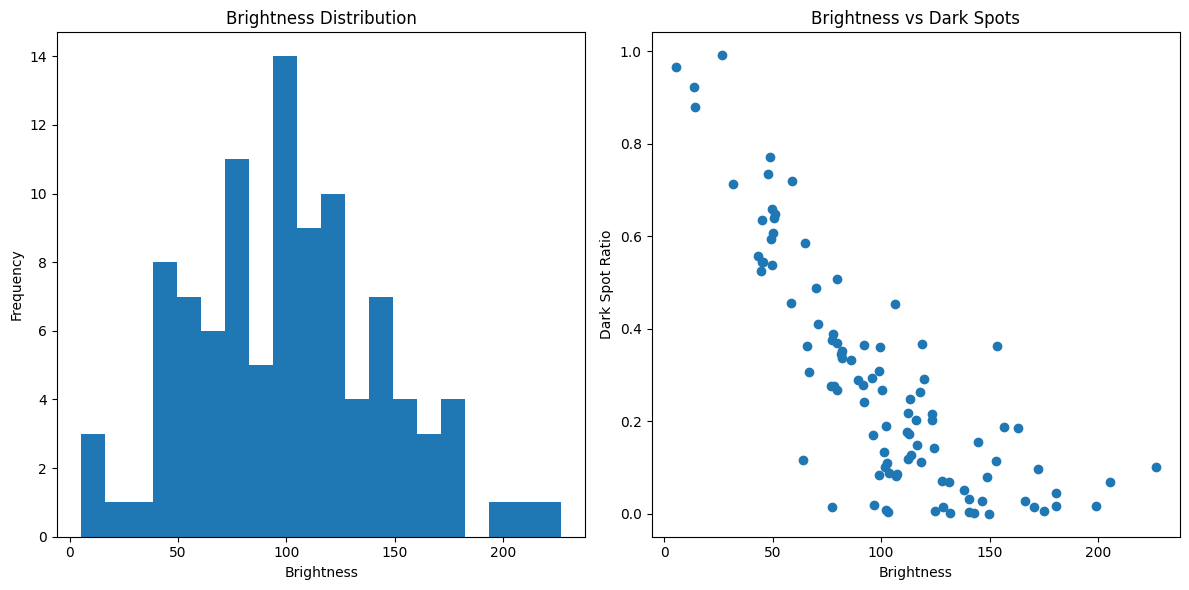

Average Brightness: 101.37
Average Dark Spot Ratio: 0.2847

Darkest Images:
PIA19396.jpg: Brightness = 5.25
PIA22249.jpg: Brightness = 13.93
PIA16478.jpg: Brightness = 14.39
PIA07943.jpg: Brightness = 26.76
PIA10694.jpg: Brightness = 31.90

Images with Most Dark Spots:
PIA07943.jpg: Dark Spot Ratio = 0.9915
PIA19396.jpg: Dark Spot Ratio = 0.9669
PIA22249.jpg: Dark Spot Ratio = 0.9229
PIA16478.jpg: Dark Spot Ratio = 0.8797
PIA09224.jpg: Dark Spot Ratio = 0.7710


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed

def analyze_image(file_path):
    try:
        with Image.open(file_path) as img:
            img = img.convert('RGB')
            img_array = np.array(img)

            # Calculate average color
            avg_color = np.mean(img_array, axis=(0, 1))

            # Calculate brightness
            brightness = np.mean(img_array)

            # Simple feature detection (e.g., detecting potential dark spots)
            dark_threshold = 50
            dark_spots = np.sum(img_array < dark_threshold) / img_array.size

            return {
                'file': os.path.basename(file_path),
                'avg_color': avg_color,
                'brightness': brightness,
                'dark_spot_ratio': dark_spots
            }
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def analyze_mars_images(directory, max_images=100):
    image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files = image_files[:max_images]  # Limit the number of images to process

    results = []
    with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
        future_to_file = {executor.submit(analyze_image, file): file for file in image_files}
        for future in as_completed(future_to_file):
            result = future.result()
            if result:
                results.append(result)

    return results

def plot_results(results):
    brightness = [r['brightness'] for r in results]
    dark_spots = [r['dark_spot_ratio'] for r in results]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(brightness, bins=20)
    plt.title('Brightness Distribution')
    plt.xlabel('Brightness')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.scatter(brightness, dark_spots)
    plt.title('Brightness vs Dark Spots')
    plt.xlabel('Brightness')
    plt.ylabel('Dark Spot Ratio')

    plt.tight_layout()
    plt.show()

# Main execution
data_dir = '/content/mars_images'
max_images = 100  # Adjust this number based on your needs and performance

print("Analyzing Mars images...")
results = analyze_mars_images(data_dir, max_images)
print(f"Analyzed {len(results)} images.")

plot_results(results)

# Print some statistics
avg_brightness = np.mean([r['brightness'] for r in results])
avg_dark_spots = np.mean([r['dark_spot_ratio'] for r in results])
print(f"Average Brightness: {avg_brightness:.2f}")
print(f"Average Dark Spot Ratio: {avg_dark_spots:.4f}")

# List potentially interesting images (e.g., darkest or with most dark spots)
sorted_by_darkness = sorted(results, key=lambda x: x['brightness'])
print("\nDarkest Images:")
for r in sorted_by_darkness[:5]:
    print(f"{r['file']}: Brightness = {r['brightness']:.2f}")

sorted_by_dark_spots = sorted(results, key=lambda x: x['dark_spot_ratio'], reverse=True)
print("\nImages with Most Dark Spots:")
for r in sorted_by_dark_spots[:5]:
    print(f"{r['file']}: Dark Spot Ratio = {r['dark_spot_ratio']:.4f}")

Error opening /content/mars_images/PIA08792.jpg: Image size (548050388 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Error opening /content/mars_images/PIA08060.jpg: Image size (191231363 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

Top 5 images for dark_spots:
File: PIA04530.jpg
  Dark Spot Ratio: 0.9998
  Edge Ratio: 0.0003
  Color Variation: 0.0099
  Potential Water Features: 0.0000

File: PIA03201.jpg
  Dark Spot Ratio: 0.9990
  Edge Ratio: 0.0328
  Color Variation: 0.0000
  Potential Water Features: 0.0002

File: PIA06340.jpg
  Dark Spot Ratio: 0.9909
  Edge Ratio: 0.0761
  Color Variation: 0.0000
  Potential Water Features: 0.0003

File: PIA07944.jpg
  Dark Spot Ratio: 0.9895
  Edge Ratio: 0.0083
  Color Variation: 0.0000
  Potential Water Features: 0.0016

File: PIA07943.jpg
  Dark Spot Ratio: 0.9893
  Edge Ratio: 0.0338
  Color Variation: 0.0395
  Potential Water Features: 0.0013


Top 5 images for high

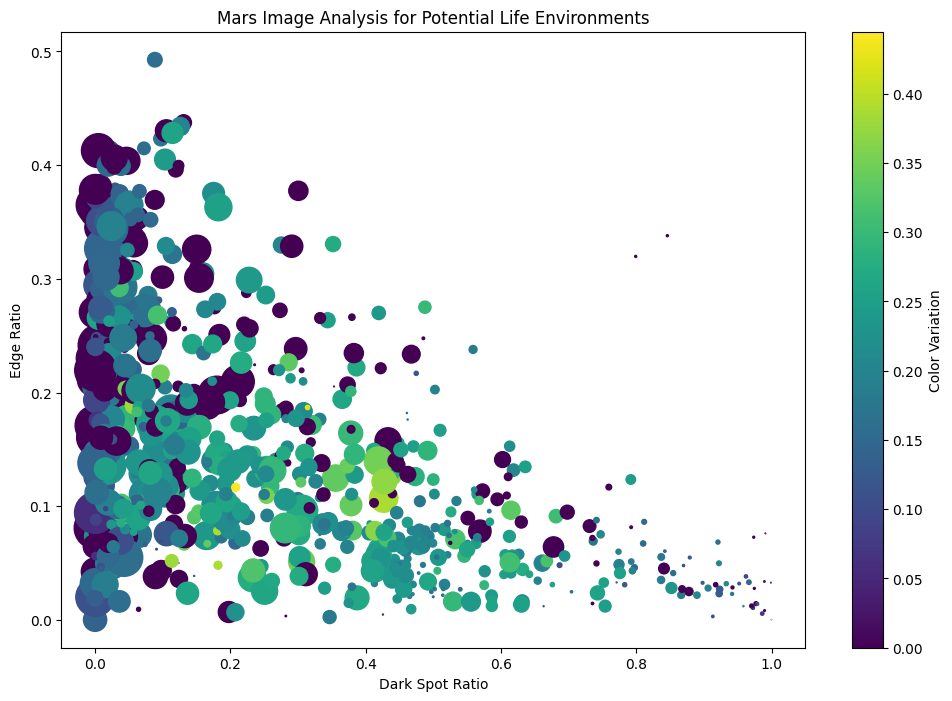

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
import warnings
from PIL import ImageFile

# Disable the DecompressionBombWarning
warnings.simplefilter('ignore', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True

def safe_open_image(file_path, max_size=(1024, 1024)):
    try:
        with Image.open(file_path) as img:
            img.thumbnail(max_size, Image.LANCZOS)
            return np.array(img)
    except Exception as e:
        print(f"Error opening {file_path}: {str(e)}")
        return None

def analyze_image_for_life_potential(file_path):
    img_array = safe_open_image(file_path)
    if img_array is None:
        return None

    # Convert to grayscale if the image is in color
    if len(img_array.shape) == 3:
        gray_img = np.mean(img_array, axis=2)
    else:
        gray_img = img_array

    # Normalize the image
    gray_img = gray_img / np.max(gray_img)

    # Calculate dark spot ratio
    dark_threshold = 0.2
    dark_spot_ratio = np.sum(gray_img < dark_threshold) / gray_img.size

    # Detect edges (potential geological features of interest)
    edges = ndimage.sobel(gray_img)
    edge_ratio = np.sum(edges > 0.1) / edges.size

    # Check for color variations (if the image is in color)
    color_variation = 0
    if len(img_array.shape) == 3:
        color_variation = np.std(img_array / np.max(img_array), axis=(0, 1)).mean()

    # Check for potential water-related features (simplified)
    potential_water = np.sum((gray_img > 0.6) & (gray_img < 0.8)) / gray_img.size

    return {
        'file': os.path.basename(file_path),
        'dark_spot_ratio': dark_spot_ratio,
        'edge_ratio': edge_ratio,
        'color_variation': color_variation,
        'potential_water': potential_water
    }

def analyze_mars_images(directory):
    results = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            file_path = os.path.join(directory, filename)
            result = analyze_image_for_life_potential(file_path)
            if result:
                results.append(result)
    return results

def find_interesting_images(results):
    # Sort images by different criteria
    dark_spots = sorted(results, key=lambda x: x['dark_spot_ratio'], reverse=True)[:5]
    high_edges = sorted(results, key=lambda x: x['edge_ratio'], reverse=True)[:5]
    color_var = sorted(results, key=lambda x: x['color_variation'], reverse=True)[:5]
    water_feat = sorted(results, key=lambda x: x['potential_water'], reverse=True)[:5]

    return {
        'dark_spots': dark_spots,
        'high_edges': high_edges,
        'color_variations': color_var,
        'water_features': water_feat
    }

# Main execution
data_dir = '/content/mars_images'
results = analyze_mars_images(data_dir)
interesting_images = find_interesting_images(results)

# Print results
categories = ['dark_spots', 'high_edges', 'color_variations', 'water_features']
for category in categories:
    print(f"\nTop 5 images for {category}:")
    for img in interesting_images[category]:
        print(f"File: {img['file']}")
        print(f"  Dark Spot Ratio: {img['dark_spot_ratio']:.4f}")
        print(f"  Edge Ratio: {img['edge_ratio']:.4f}")
        print(f"  Color Variation: {img['color_variation']:.4f}")
        print(f"  Potential Water Features: {img['potential_water']:.4f}")
        print()

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter([r['dark_spot_ratio'] for r in results],
            [r['edge_ratio'] for r in results],
            c=[r['color_variation'] for r in results],
            s=[r['potential_water']*1000 for r in results])
plt.xlabel('Dark Spot Ratio')
plt.ylabel('Edge Ratio')
plt.title('Mars Image Analysis for Potential Life Environments')
plt.colorbar(label='Color Variation')
plt.show()

Error opening /content/mars_images/PIA08792.jpg: Image size (548050388 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Error opening /content/mars_images/PIA08060.jpg: Image size (191231363 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Top 10 Most Promising Images for Potential Life Environments:
1. File: PIA02818.jpg
   Score: 0.3345
   Dark Spot Ratio: 0.4266
   Edge Ratio: 0.1072
   Color Variation: 0.3887
   Potential Water Features: 0.4156

2. File: PIA02820.jpg
   Score: 0.3317
   Dark Spot Ratio: 0.4188
   Edge Ratio: 0.1397
   Color Variation: 0.3502
   Potential Water Features: 0.4183

3. File: PIA02819.jpg
   Score: 0.3280
   Dark Spot Ratio: 0.4331
   Edge Ratio: 0.1290
   Color Variation: 0.3652
   Potential Water Features: 0.3849

4. File: PIA02816.jpg
   Score: 0.3091
   Dark Spot Ratio: 0.4276
   Edge Ratio: 0.1217
   Color Variation: 0.3701
   Potential Water Features: 0.3169

5. File: PIA12861.jpg


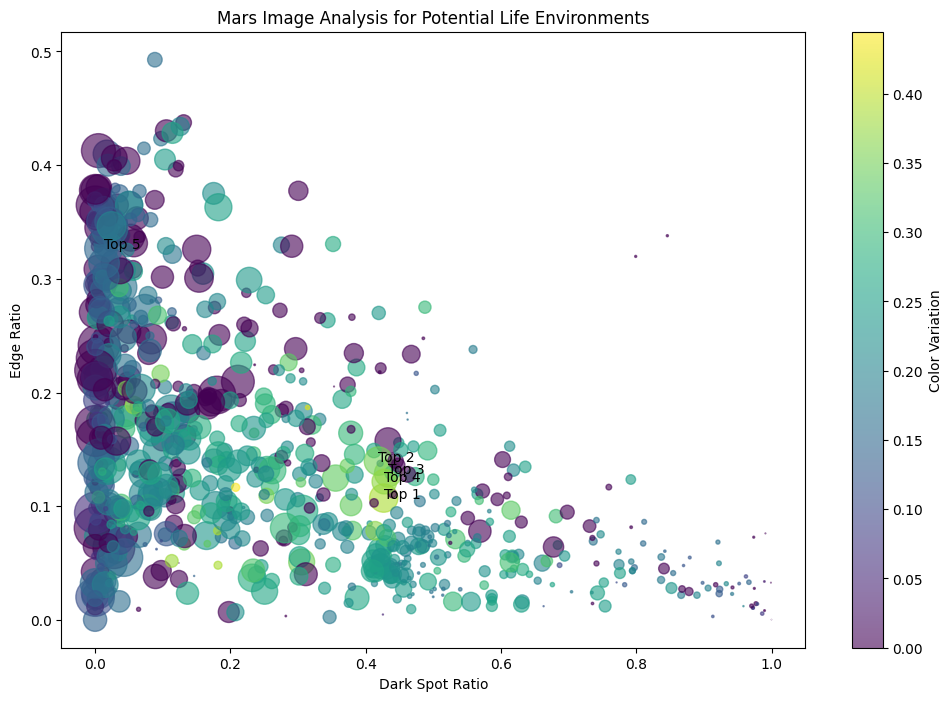

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
import warnings
from PIL import ImageFile

warnings.simplefilter('ignore', Image.DecompressionBombWarning)
ImageFile.LOAD_TRUNCATED_IMAGES = True

def safe_open_image(file_path, max_size=(1024, 1024)):
    try:
        with Image.open(file_path) as img:
            img.thumbnail(max_size, Image.LANCZOS)
            return np.array(img)
    except Exception as e:
        print(f"Error opening {file_path}: {str(e)}")
        return None

def analyze_image(file_path):
    img_array = safe_open_image(file_path)
    if img_array is None:
        return None

    if len(img_array.shape) == 3:
        gray_img = np.mean(img_array, axis=2)
    else:
        gray_img = img_array

    gray_img = gray_img / np.max(gray_img)

    dark_threshold = 0.2
    dark_spot_ratio = np.sum(gray_img < dark_threshold) / gray_img.size

    edges = ndimage.sobel(gray_img)
    edge_ratio = np.sum(edges > 0.1) / edges.size

    color_variation = 0
    if len(img_array.shape) == 3:
        color_variation = np.std(img_array / np.max(img_array), axis=(0, 1)).mean()

    potential_water = np.sum((gray_img > 0.6) & (gray_img < 0.8)) / gray_img.size

    return {
        'file': os.path.basename(file_path),
        'dark_spot_ratio': dark_spot_ratio,
        'edge_ratio': edge_ratio,
        'color_variation': color_variation,
        'potential_water': potential_water
    }

def score_image(image_data):
    # Define weights for each feature
    weights = {
        'dark_spot_ratio': 0.25,
        'edge_ratio': 0.25,
        'color_variation': 0.25,
        'potential_water': 0.25
    }

    # Calculate score
    score = (
        weights['dark_spot_ratio'] * image_data['dark_spot_ratio'] +
        weights['edge_ratio'] * image_data['edge_ratio'] +
        weights['color_variation'] * image_data['color_variation'] +
        weights['potential_water'] * image_data['potential_water']
    )

    return score

def analyze_mars_images(directory):
    results = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            file_path = os.path.join(directory, filename)
            result = analyze_image(file_path)
            if result:
                result['score'] = score_image(result)
                results.append(result)
    return results

# Main execution
data_dir = '/content/mars_images'
results = analyze_mars_images(data_dir)

# Sort results by score
sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)

# Print top 10 most promising images
print("Top 10 Most Promising Images for Potential Life Environments:")
for i, result in enumerate(sorted_results[:10], 1):
    print(f"{i}. File: {result['file']}")
    print(f"   Score: {result['score']:.4f}")
    print(f"   Dark Spot Ratio: {result['dark_spot_ratio']:.4f}")
    print(f"   Edge Ratio: {result['edge_ratio']:.4f}")
    print(f"   Color Variation: {result['color_variation']:.4f}")
    print(f"   Potential Water Features: {result['potential_water']:.4f}")
    print()

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter([r['dark_spot_ratio'] for r in results],
            [r['edge_ratio'] for r in results],
            c=[r['color_variation'] for r in results],
            s=[r['potential_water']*1000 for r in results],
            alpha=0.6)
plt.xlabel('Dark Spot Ratio')
plt.ylabel('Edge Ratio')
plt.title('Mars Image Analysis for Potential Life Environments')
plt.colorbar(label='Color Variation')

# Annotate top 5 images
for i, result in enumerate(sorted_results[:5]):
    plt.annotate(f"Top {i+1}", (result['dark_spot_ratio'], result['edge_ratio']))

plt.show()

Error opening /content/mars_images/PIA08792.jpg: Image size (548050388 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.
Error opening /content/mars_images/PIA08060.jpg: Image size (191231363 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.


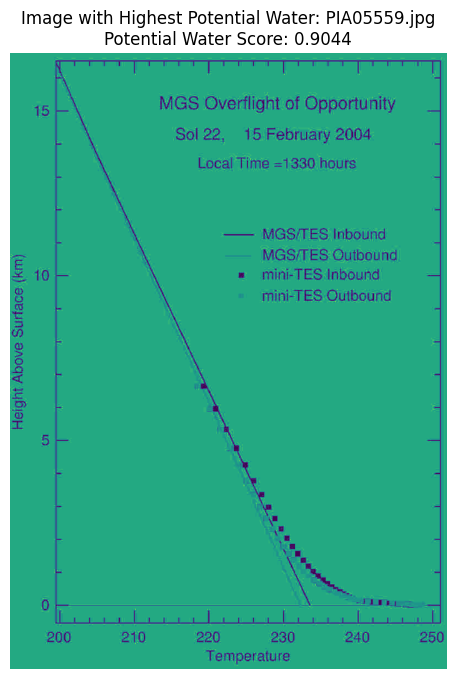

Image with highest potential water: PIA05559.jpg
Potential water score: 0.9044


In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', Image.DecompressionBombWarning)

def safe_open_image(file_path, max_size=(1024, 1024)):
    try:
        with Image.open(file_path) as img:
            img.thumbnail(max_size, Image.LANCZOS)
            return np.array(img)
    except Exception as e:
        print(f"Error opening {file_path}: {str(e)}")
        return None

def analyze_image(file_path):
    img_array = safe_open_image(file_path)
    if img_array is None:
        return None

    if len(img_array.shape) == 3:
        gray_img = np.mean(img_array, axis=2)
    else:
        gray_img = img_array

    gray_img = gray_img.astype(float) / np.max(gray_img)

    potential_water = np.sum((gray_img > 0.6) & (gray_img < 0.8)) / gray_img.size

    return {
        'file': os.path.basename(file_path),
        'potential_water': potential_water,
        'image': img_array
    }

def analyze_mars_images(directory):
    results = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
            file_path = os.path.join(directory, filename)
            result = analyze_image(file_path)
            if result:
                results.append(result)
    return results

# Main execution
data_dir = '/content/mars_images'
results = analyze_mars_images(data_dir)

# Sort results by potential water, highest first
sorted_results = sorted(results, key=lambda x: x['potential_water'], reverse=True)

# Get the image with the highest potential water
highest_water_image = sorted_results[0]

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(highest_water_image['image'])
plt.title(f"Image with Highest Potential Water: {highest_water_image['file']}\nPotential Water Score: {highest_water_image['potential_water']:.4f}")
plt.axis('off')
plt.show()

print(f"Image with highest potential water: {highest_water_image['file']}")
print(f"Potential water score: {highest_water_image['potential_water']:.4f}")

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import filters, feature

def is_rover_image(img_array):
    # Check if the image has a typical rover image aspect ratio
    aspect_ratio = img_array.shape[1] / img_array.shape[0]
    return 1.2 < aspect_ratio < 1.8

def detect_water_features(img_array):
    # Convert to grayscale if it's a color image
    if len(img_array.shape) == 3:
        gray_img = np.mean(img_array, axis=2)
    else:
        gray_img = img_array

    # Normalize the image
    gray_img = (gray_img - np.min(gray_img)) / (np.max(gray_img) - np.min(gray_img))

    # Edge detection
    edges = feature.canny(gray_img, sigma=2)

    # Smooth regions (potential water or ice)
    smooth = filters.gaussian(gray_img, sigma=2)
    smooth_mask = (smooth > 0.2) & (smooth < 0.8)

    # Combine smooth regions with low edge density
    water_feature_mask = smooth_mask & ~edges

    return np.sum(water_feature_mask) / water_feature_mask.size

def analyze_rover_images(directory):
    results = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')):
            try:
                with Image.open(os.path.join(directory, filename)) as img:
                    img_array = np.array(img)
                    if is_rover_image(img_array):
                        water_score = detect_water_features(img_array)
                        results.append({
                            'file': filename,
                            'water_score': water_score,
                            'image': img_array
                        })
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    return results

# Main execution
data_dir = '/content/mars_images'
results = analyze_rover_images(data_dir)

# Sort results by water score, highest first
sorted_results = sorted(results, key=lambda x: x['water_score'], reverse=True)

# Display top 3 images with highest water scores
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, result in enumerate(sorted_results[:3]):
    axes[i].imshow(result['image'])
    axes[i].set_title(f"{result['file']}\nWater Score: {result['water_score']:.4f}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print details of top 5 images
print("Top 5 Rover Images with Potential Water Features:")
for i, result in enumerate(sorted_results[:5], 1):
    print(f"{i}. {result['file']} - Water Score: {result['water_score']:.4f}")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (98799512 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Starting analysis...
Scanning directory: /content/mars_images
Processing file: /content/mars_images/PIA01467.jpg
  PIA01467.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA12488.jpg
  PIA12488.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA03639.jpg
  PIA03639.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA10247.jpg
  PIA10247.jpg is a valid rover image.
  Water score: 0.9803
Processing file: /content/mars_images/PIA10743.jpg
  PIA10743.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA05491.jpg
  PIA05491.jpg is a valid rover image.
  Water score: 0.2570
Processing file: /content/mars_images/PIA14834.jpg
  PIA14834.jpg is a valid rover image.
  Water score: 0.1898
Processing file: /content/mars_images/PIA21488.jpg
  PIA21488.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA05209.jpg
  PIA05209.jpg does not meet rover image 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (98799512 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


  PIA24765.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA23965.jpg
  PIA23965.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA13163.jpg
  PIA13163.jpg is a valid rover image.
  Water score: 0.7418
Processing file: /content/mars_images/PIA01120.jpg
  PIA01120.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA02346.jpg
  PIA02346.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA12193.jpg
  PIA12193.jpg is a valid rover image.
  Water score: 0.4848
Processing file: /content/mars_images/PIA19291.jpg
  PIA19291.jpg is a valid rover image.
  Water score: 0.8527
Processing file: /content/mars_images/PIA07253.jpg
  PIA07253.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA08450.jpg
  PIA08450.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA16478.jpg
  PIA16478.jpg is a valid rover image.
  Water score

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (161792400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


  PIA13804.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA07942.jpg
  PIA07942.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA23963.jpg
  PIA23963.jpg is a valid rover image.
  Water score: 0.8795
Processing file: /content/mars_images/PIA04246.jpg
  PIA04246.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA25882.jpg
  PIA25882.jpg is a valid rover image.
  Water score: 0.5053
Processing file: /content/mars_images/PIA04149.jpg
  PIA04149.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA07943.jpg
  PIA07943.jpg does not meet rover image criteria.
Processing file: /content/mars_images/PIA23517.jpg
  PIA23517.jpg is a valid rover image.
  Water score: 0.7499
Processing file: /content/mars_images/PIA25661.jpg
  PIA25661.jpg is a valid rover image.
  Water score: 0.6067
Processing file: /content/mars_images/PIA26233.jpg
  PIA26233.jpg does not meet rover image c

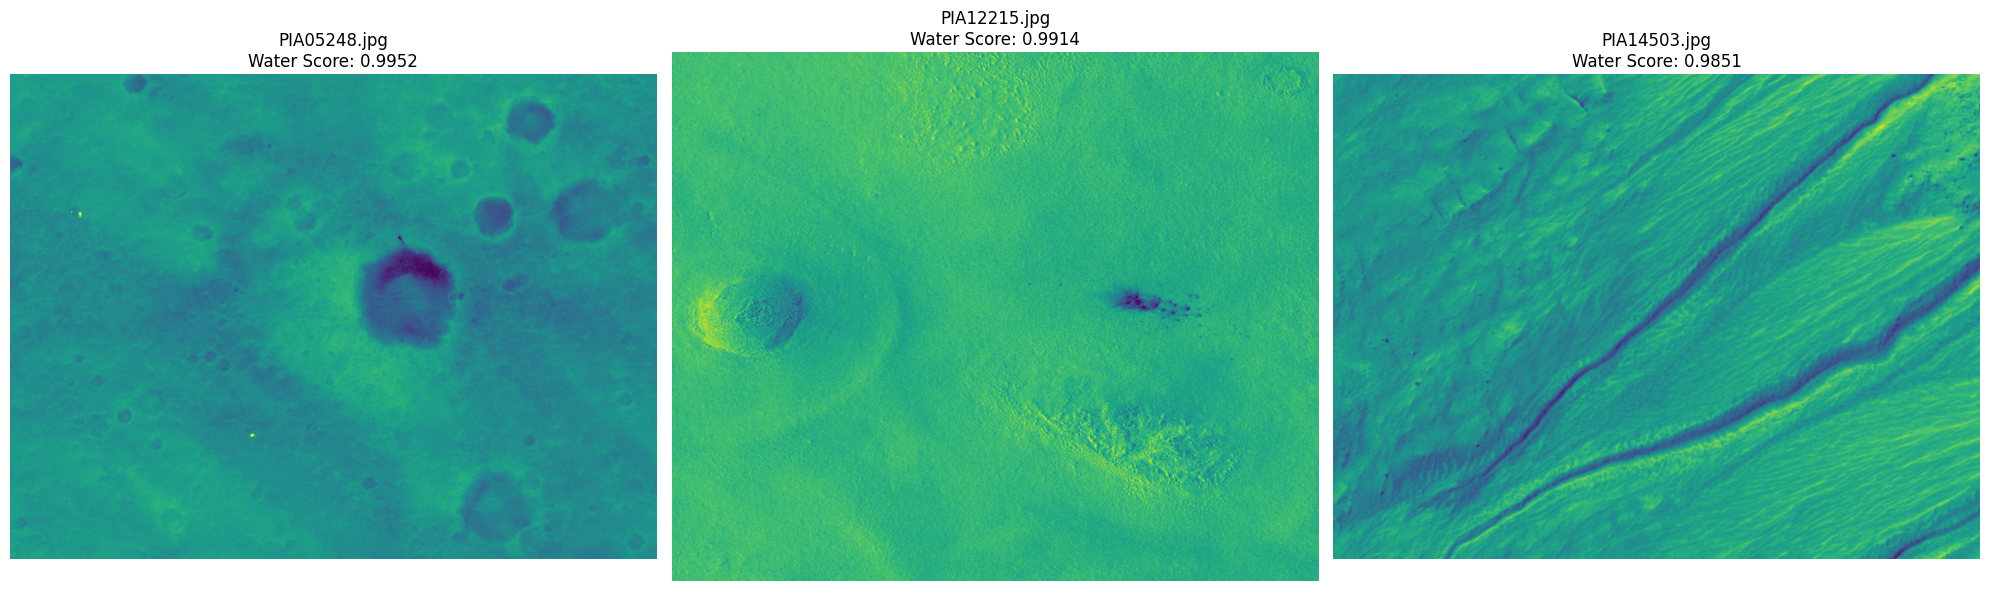

Analysis complete.


In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import filters, feature

def is_rover_image(img_array):
    aspect_ratio = img_array.shape[1] / img_array.shape[0]
    return 1.2 < aspect_ratio < 1.8

def detect_water_features(img_array):
    if len(img_array.shape) == 3:
        gray_img = np.mean(img_array, axis=2)
    else:
        gray_img = img_array

    gray_img = (gray_img - np.min(gray_img)) / (np.max(gray_img) - np.min(gray_img))
    edges = feature.canny(gray_img, sigma=2)
    smooth = filters.gaussian(gray_img, sigma=2)
    smooth_mask = (smooth > 0.2) & (smooth < 0.8)
    water_feature_mask = smooth_mask & ~edges
    return np.sum(water_feature_mask) / water_feature_mask.size

def analyze_rover_images(directory):
    results = []
    print(f"Scanning directory: {directory}")
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')):
            file_path = os.path.join(directory, filename)
            print(f"Processing file: {file_path}")
            try:
                with Image.open(file_path) as img:
                    img_array = np.array(img)
                    if is_rover_image(img_array):
                        print(f"  {filename} is a valid rover image.")
                        water_score = detect_water_features(img_array)
                        results.append({
                            'file': filename,
                            'water_score': water_score,
                            'image': img_array
                        })
                        print(f"  Water score: {water_score:.4f}")
                    else:
                        print(f"  {filename} does not meet rover image criteria.")
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    print(f"Total valid rover images processed: {len(results)}")
    return results

# Main execution
data_dir = '/content/mars_images'
print("Starting analysis...")
results = analyze_rover_images(data_dir)

if not results:
    print("No valid rover images found or processed.")
else:
    sorted_results = sorted(results, key=lambda x: x['water_score'], reverse=True)

    print("\nTop 5 Rover Images with Potential Water Features:")
    for i, result in enumerate(sorted_results[:5], 1):
        print(f"{i}. {result['file']} - Water Score: {result['water_score']:.4f}")

    # Display top 3 images
    fig, axes = plt.subplots(1, min(3, len(results)), figsize=(20, 6))
    if len(results) == 1:
        axes = [axes]  # Make axes iterable if there's only one image
    for i, result in enumerate(sorted_results[:3]):
        axes[i].imshow(result['image'])
        axes[i].set_title(f"{result['file']}\nWater Score: {result['water_score']:.4f}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("Analysis complete.")